In [1]:
from lir_proteome_screen_pssm import environment as env
from lir_proteome_screen_pssm import pssms
import pandas as pd
import numpy as np
import logomaker as lm
import matplotlib.pyplot as plt
plt.style.use('custom_standard')
plt.style.use('custom_small')
import seaborn as sns

from pathlib import Path

%load_ext autoreload
%autoreload 2

In [10]:
import lir_proteome_screen_pssm.sequence_utils as seqtools

df = pd.read_csv(env.RAWFILEPATHS.full_screening_table, sep='\t')
df = df[df['avg_z_score'] >= 1.7].copy()

def get_regex_matches(s: pd.Series, regex: str):
    matches = list(seqtools.get_regex_matches(regex, s["ID"]))
    # if len(matches) == 0:
    #     return
    return matches

In [5]:
df

,Unnamed: 0,ID,ER 0,ER 1,ER 3,ER 4,ER 5,ER 6,Input Count,1 Count,...,Query start,Query End,Hit Start,Hit End,E-value,Score (Bits),z_score_4,z_score_5,z_score_6,avg_z_score
0,0,DIDNFDIDDFDDDDDWEDICII,0,4.094998,9.506665,12.105609,13.229315,14.031836,976,9092,...,5.0,19.0,256.0,270.0,1.900000e+00,23.1,3.574377,4.082822,4.670163,4.11
1,1,LWQPHSSKQDDMWEHIAISML,0,4.420856,9.955033,12.104137,12.854852,13.584948,244,2849,...,1.0,17.0,465.0,481.0,4.550000e-07,42.0,3.573749,3.927170,4.482965,3.99
2,2,VIEEADLDGDGSWALLTSRT,0,6.061220,10.521183,11.960512,12.786388,12.782009,10,364,...,1.0,11.0,152.0,162.0,7.100000e-02,27.3,3.512489,3.898712,4.146620,3.85
3,3,LHNPESGEEAVALLEELQRDLGWDILA,0,5.191722,10.334677,12.020974,12.594453,12.509488,13,259,...,1.0,21.0,117.0,137.0,1.010000e-08,47.0,3.538278,3.818930,4.032463,3.80
4,4,QIPENSTSSQADDEWCYVLI,0,5.148098,10.131437,11.838327,12.629829,12.705135,91,1759,...,1.0,10.0,552.0,561.0,1.400000e+00,23.5,3.460374,3.833635,4.114419,3.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,422,ASQGSDDDWDDEWDDSSTVADEPGALGSGAYPDLDG,0,6.093138,7.077381,7.625063,7.758434,6.743610,28,1042,...,1.0,36.0,146.0,181.0,1.450000e-17,72.4,1.663313,1.808750,1.617183,1.70
416,423,LEATGPGGSQAINNLRRSNSTTQVSQPRSGSPRPTE,0,6.929649,7.823032,8.205766,7.752720,6.165534,11,731,...,1.0,36.0,59.0,94.0,3.150000e-18,74.3,1.910997,1.806375,1.375032,1.70
417,424,MPNTSVVLDTDAEFVILLLFLLLLFFFFRASFA,0,4.431676,7.914457,8.140802,7.387363,6.622837,407,4788,...,1.0,15.0,642.0,656.0,1.750000e-04,35.4,1.883288,1.654507,1.566592,1.70
418,425,MSQAVQQRYSTIKQNMGTQFI,0,3.409332,7.021036,7.790198,7.932998,6.418514,48,278,...,NaN,NaN,NaN,NaN,NaN,NaN,1.733747,1.881311,1.481003,1.70


<Axes: >

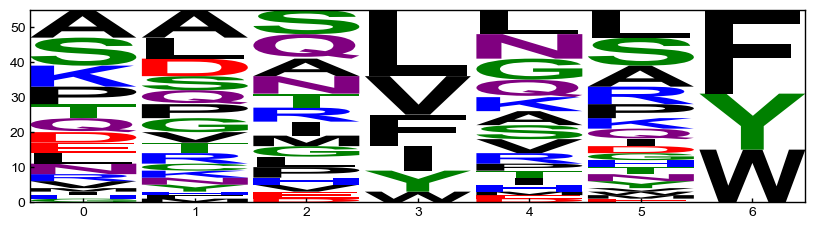

In [21]:
df["oldlir_regex_matches"] = df.apply(get_regex_matches, axis=1, regex="...[FWY]..[LVI]")
df["oldlir_num_regex_matches"] = df["oldlir_regex_matches"].apply(lambda x: len(x))
df["newlir_regex_matches"] = df.apply(get_regex_matches, axis=1, regex="...[FWYLVI]..[WFY]")
df["newlir_num_regex_matches"] = df["newlir_regex_matches"].apply(lambda x: len(x))
only1newlir = (
    df[(df["newlir_num_regex_matches"] == 1) & (df["oldlir_num_regex_matches"] == 0)]
    .copy()
    .reset_index(drop=True)
)
only1newlir["newlir_regex_matches"] = only1newlir["newlir_regex_matches"].apply(
    lambda x: x[0]
)
only1newlir[["7mer", "7mer_start", "7mer_end"]] = pd.DataFrame(
    only1newlir["newlir_regex_matches"].tolist(), index=only1newlir.index
)
pssms.plot_logo(pssms.seqlist_2_counts_matrix(only1newlir["7mer"].to_list()))

<Axes: >

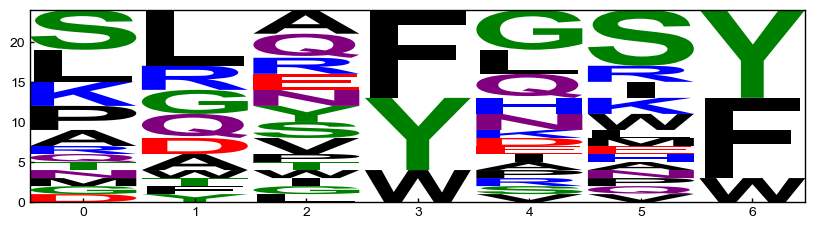

In [22]:
df["oldlir_regex_matches"] = df.apply(get_regex_matches, axis=1, regex="...[FWY]..[LVI]")
df["oldlir_num_regex_matches"] = df["oldlir_regex_matches"].apply(lambda x: len(x))
df["newlir_regex_matches"] = df.apply(get_regex_matches, axis=1, regex="...[FWY]..[WFY]")
df["newlir_num_regex_matches"] = df["newlir_regex_matches"].apply(lambda x: len(x))
only1newlir = (
    df[(df["newlir_num_regex_matches"] == 1) & (df["oldlir_num_regex_matches"] == 0)]
    .copy()
    .reset_index(drop=True)
)
only1newlir["newlir_regex_matches"] = only1newlir["newlir_regex_matches"].apply(
    lambda x: x[0]
)
only1newlir[["7mer", "7mer_start", "7mer_end"]] = pd.DataFrame(
    only1newlir["newlir_regex_matches"].tolist(), index=only1newlir.index
)
pssms.plot_logo(pssms.seqlist_2_counts_matrix(only1newlir["7mer"].to_list()))

<Axes: >

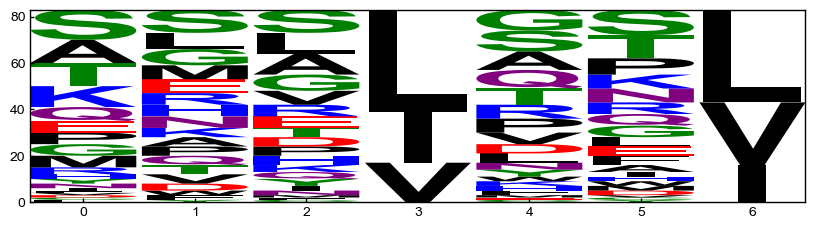

In [6]:
df["oldlir_regex_matches"] = df.apply(get_regex_matches, axis=1, regex="...[FWY]..[FWYLVI]")
df["oldlir_num_regex_matches"] = df["oldlir_regex_matches"].apply(lambda x: len(x))
df["newlir_regex_matches"] = df.apply(get_regex_matches, axis=1, regex="...[LVI]..[LVI]")
df["newlir_num_regex_matches"] = df["newlir_regex_matches"].apply(lambda x: len(x))
only1newlir = (
    df[(df["newlir_num_regex_matches"] == 1) & (df["oldlir_num_regex_matches"] == 0)]
    .copy()
    .reset_index(drop=True)
)
only1newlir["newlir_regex_matches"] = only1newlir["newlir_regex_matches"].apply(
    lambda x: x[0]
)
only1newlir[["7mer", "7mer_start", "7mer_end"]] = pd.DataFrame(
    only1newlir["newlir_regex_matches"].tolist(), index=only1newlir.index
)
pssms.plot_logo(pssms.seqlist_2_counts_matrix(only1newlir["7mer"].to_list()))

In [11]:


r = "...[FWY]..[LVI]"
df['matches'] = df.apply(get_regex_matches, axis=1, regex = r)
df["n_matches"] = df["matches"].apply(lambda x: len(x))
print(r, len(df[df["n_matches"] > 0]))
df = df[df["n_matches"] == 0].copy()
r = "...[FWY]..[FWY]"
df['matches'] = df.apply(get_regex_matches, axis=1, regex = r)
df["n_matches"] = df["matches"].apply(lambda x: len(x))
print(r, len(df[df["n_matches"] > 0]))
df = df[df["n_matches"] == 0].copy()
r = "...[LVI]..[LVI]"
df['matches'] = df.apply(get_regex_matches, axis=1, regex = r)
df["n_matches"] = df["matches"].apply(lambda x: len(x))
print(r, len(df[df["n_matches"] > 0]))
df = df[df["n_matches"] == 0].copy()
r = "...[LVI]..[FWY]"
df['matches'] = df.apply(get_regex_matches, axis=1, regex = r)
df["n_matches"] = df["matches"].apply(lambda x: len(x))
print(r, len(df[df["n_matches"] > 0]))
df = df[df["n_matches"] == 0].copy()

...[FWY]..[LVI] 202
...[FWY]..[FWY] 27
...[LVI]..[LVI] 108
...[LVI]..[FWY] 18


In [ ]:


df.apply(get_regex_matches, axis=1, regex = "...[FWY]..[LVI]")
["...[FWY]..[FWY]"]
["...[LVI]..[LVI]"]
["...[LVI]..[FWY]"]


In [35]:
print(len(df[df['newlir_num_regex_matches'] > 0]))
print(len(df[df['oldlir_num_regex_matches'] > 0]))

143
202


In [ ]:

df_multi = df[df["num_regex_matches"] > 1].copy()
df_multi = df_multi.explode("regex_matches")
df_single = df[df["num_regex_matches"] == 1].copy()
df_single["regex_matches"] = df_single["regex_matches"].apply(lambda x: x[0])
df = pd.concat([df_multi, df_single])
df[["8mer", "8mer_start", "8mer_end"]] = pd.DataFrame(
    df["regex_matches"].tolist(), index=df.index
)